In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import random
import math

from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay

keras.utils.to_categorical

In [2]:
df = pd.DataFrame(columns= ['Name','File_path'])

In [3]:
df.head()

,Name,File_path


In [4]:
directory = 'post-processed/'
 
for root, dirs, files in os.walk(directory):
    for filename in files:
        new_row = {'Name':root.split('/')[1],'File_path':root+'/'+filename}
        df = df.append(new_row, ignore_index=True)
        print(os.path.join(root, filename))

post-processed/Aaron_Eckhart\Aaron_Eckhart_0001_0000.jpg
post-processed/Aaron_Eckhart\Aaron_Eckhart_0001_0001.jpg
post-processed/Aaron_Eckhart\Aaron_Eckhart_0001_0002.jpg
post-processed/Aaron_Eckhart\Aaron_Eckhart_0002_0000.jpg
post-processed/Aaron_Eckhart\Aaron_Eckhart_0002_0001.jpg
post-processed/Aaron_Eckhart\Aaron_Eckhart_0002_0002.jpg
post-processed/Aaron_Guiel\Aaron_Guiel_0001_0000.jpg
post-processed/Aaron_Guiel\Aaron_Guiel_0002_0000.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0001_0000.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0001_0001.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0001_0002.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0001_0003.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0002_0000.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0003_0000.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0003_0001.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0003_0002.jpg
post-processed/Aaron_Peirsol\Aaron_Peirsol_0004_0000.jpg
post-processed/Aaron_Peirsol\Aaron_Peir

post-processed/Alanna_Ubach\Alanna_Ubach_0002_0000.jpg
post-processed/Alanna_Ubach\Alanna_Ubach_0002_0001.jpg
post-processed/Alanna_Ubach\Alanna_Ubach_0002_0002.jpg
post-processed/Alan_Ball\Alan_Ball_0001_0000.jpg
post-processed/Alan_Ball\Alan_Ball_0001_0001.jpg
post-processed/Alan_Ball\Alan_Ball_0003_0000.jpg
post-processed/Alan_Ball\Alan_Ball_0004_0000.jpg
post-processed/Alan_Dershowitz\Alan_Dershowitz_0001_0000.jpg
post-processed/Alan_Dershowitz\Alan_Dershowitz_0003_0000.jpg
post-processed/Alan_Dershowitz\Alan_Dershowitz_0003_0001.jpg
post-processed/Alan_Dershowitz\Alan_Dershowitz_0004_0000.jpg
post-processed/Alan_Greenspan\Alan_Greenspan_0001_0000.jpg
post-processed/Alan_Greenspan\Alan_Greenspan_0001_0001.jpg
post-processed/Alan_Greenspan\Alan_Greenspan_0001_0002.jpg
post-processed/Alan_Greenspan\Alan_Greenspan_0003_0000.jpg
post-processed/Alan_Greenspan\Alan_Greenspan_0003_0001.jpg
post-processed/Alan_Greenspan\Alan_Greenspan_0004_0000.jpg
post-processed/Alan_Mulally\Alan_Mulally_

post-processed/Alimzhan_Tokhtakhounov\Alimzhan_Tokhtakhounov_0001_0000.jpg
post-processed/Alimzhan_Tokhtakhounov\Alimzhan_Tokhtakhounov_0004_0000.jpg
post-processed/Alina_Kabaeva\Alina_Kabaeva_0001_0000.jpg
post-processed/Alina_Kabaeva\Alina_Kabaeva_0001_0001.jpg
post-processed/Alina_Kabaeva\Alina_Kabaeva_0002_0000.jpg
post-processed/Alina_Kabaeva\Alina_Kabaeva_0002_0001.jpg
post-processed/Aline_Chretien\Aline_Chretien_0001_0000.jpg
post-processed/Aline_Chretien\Aline_Chretien_0004_0000.jpg
post-processed/Ali_Abdullah_Saleh\Ali_Abdullah_Saleh_0001_0000.jpg
post-processed/Ali_Abdullah_Saleh\Ali_Abdullah_Saleh_0004_0000.jpg
post-processed/Ali_Bin_Hussein\Ali_Bin_Hussein_0001_0000.jpg
post-processed/Ali_Bin_Hussein\Ali_Bin_Hussein_0002_0000.jpg
post-processed/Ali_Khamenei\Ali_Khamenei_0001_0000.jpg
post-processed/Ali_Khamenei\Ali_Khamenei_0001_0001.jpg
post-processed/Ali_Khamenei\Ali_Khamenei_0001_0002.jpg
post-processed/Ali_Khamenei\Ali_Khamenei_0002_0000.jpg
post-processed/Ali_Khamenei\

post-processed/Andrew_Niccol\Andrew_Niccol_0002_0000.jpg
post-processed/Andrew_Weissmann\Andrew_Weissmann_0001_0000.jpg
post-processed/Andrew_Weissmann\Andrew_Weissmann_0001_0001.jpg
post-processed/Andrew_Weissmann\Andrew_Weissmann_0002_0000.jpg
post-processed/Andre_Agassi\Andre_Agassi_0001_0000.jpg
post-processed/Andre_Agassi\Andre_Agassi_0001_0001.jpg
post-processed/Andre_Agassi\Andre_Agassi_0001_0002.jpg
post-processed/Andre_Agassi\Andre_Agassi_0002_0000.jpg
post-processed/Andre_Agassi\Andre_Agassi_0003_0000.jpg
post-processed/Andre_Agassi\Andre_Agassi_0004_0000.jpg
post-processed/Andre_Agassi\Andre_Agassi_0004_0001.jpg
post-processed/Andre_Bucher\Andre_Bucher_0001_0000.jpg
post-processed/Andre_Bucher\Andre_Bucher_0003_0000.jpg
post-processed/Andre_Techine\Andre_Techine_0001_0000.jpg
post-processed/Andre_Techine\Andre_Techine_0003_0000.jpg
post-processed/Andy_Benes\Andy_Benes_0001_0000.jpg
post-processed/Andy_Benes\Andy_Benes_0001_0001.jpg
post-processed/Andy_Benes\Andy_Benes_0002_0

post-processed/Antje_Buschschulte\Antje_Buschschulte_0004_0000.jpg
post-processed/Antje_Buschschulte\Antje_Buschschulte_0004_0001.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0001_0000.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0002_0000.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0002_0001.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0003_0000.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0003_0001.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0003_0002.jpg
post-processed/Antonio_Banderas\Antonio_Banderas_0003_0003.jpg
post-processed/Antonio_Cassano\Antonio_Cassano_0001_0000.jpg
post-processed/Antonio_Cassano\Antonio_Cassano_0004_0000.jpg
post-processed/Antonio_Catania\Antonio_Catania_0001_0000.jpg
post-processed/Antonio_Catania\Antonio_Catania_0001_0001.jpg
post-processed/Antonio_Catania\Antonio_Catania_0001_0002.jpg
post-processed/Antonio_Catania\Antonio_Catania_0001_0003.jpg
post-processed/Antonio_Catania\Antonio_Catania_0002_0000.jp

post-processed/Babe_Ruth\Babe_Ruth_0001_0001.jpg
post-processed/Babe_Ruth\Babe_Ruth_0001_0002.jpg
post-processed/Babe_Ruth\Babe_Ruth_0002_0000.jpg
post-processed/Babe_Ruth\Babe_Ruth_0003_0000.jpg
post-processed/Babe_Ruth\Babe_Ruth_0003_0001.jpg
post-processed/Babe_Ruth\Babe_Ruth_0004_0000.jpg
post-processed/Baburam_Bhattari\Baburam_Bhattari_0001_0000.jpg
post-processed/Baburam_Bhattari\Baburam_Bhattari_0002_0000.jpg
post-processed/Barbara_Becker\Barbara_Becker_0001_0000.jpg
post-processed/Barbara_Becker\Barbara_Becker_0002_0000.jpg
post-processed/Barbara_Bodine\Barbara_Bodine_0001_0000.jpg
post-processed/Barbara_Bodine\Barbara_Bodine_0001_0001.jpg
post-processed/Barbara_Boxer\Barbara_Boxer_0001_0000.jpg
post-processed/Barbara_Boxer\Barbara_Boxer_0004_0000.jpg
post-processed/Barbara_Brezigar\Barbara_Brezigar_0001_0000.jpg
post-processed/Barbara_Brezigar\Barbara_Brezigar_0001_0001.jpg
post-processed/Barbara_Brezigar\Barbara_Brezigar_0002_0000.jpg
post-processed/Barbara_De_Brun\Barbara_De

post-processed/Bernard_Landry\Bernard_Landry_0001_0000.jpg
post-processed/Bernard_Landry\Bernard_Landry_0001_0001.jpg
post-processed/Bernard_Landry\Bernard_Landry_0001_0002.jpg
post-processed/Bernard_Landry\Bernard_Landry_0002_0000.jpg
post-processed/Bernard_Landry\Bernard_Landry_0002_0001.jpg
post-processed/Bernard_Landry\Bernard_Landry_0002_0002.jpg
post-processed/Bernard_Law\Bernard_Law_0001_0000.jpg
post-processed/Bernard_Law\Bernard_Law_0001_0001.jpg
post-processed/Bernard_Law\Bernard_Law_0002_0000.jpg
post-processed/Bernard_Law\Bernard_Law_0002_0001.jpg
post-processed/Bernard_Law\Bernard_Law_0003_0000.jpg
post-processed/Bernard_Law\Bernard_Law_0004_0000.jpg
post-processed/Bernard_Lord\Bernard_Lord_0001_0000.jpg
post-processed/Bernard_Lord\Bernard_Lord_0001_0001.jpg
post-processed/Bernard_Lord\Bernard_Lord_0001_0002.jpg
post-processed/Bernard_Lord\Bernard_Lord_0001_0003.jpg
post-processed/Bernard_Lord\Bernard_Lord_0002_0000.jpg
post-processed/Bertie_Ahern\Bertie_Ahern_0001_0000.jp

post-processed/Bill_Stein\Bill_Stein_0002_0000.jpg
post-processed/Bing_Crosby\Bing_Crosby_0001_0000.jpg
post-processed/Bing_Crosby\Bing_Crosby_0003_0000.jpg
post-processed/Binyamin_Ben-Eliezer\Binyamin_Ben-Eliezer_0001_0000.jpg
post-processed/Binyamin_Ben-Eliezer\Binyamin_Ben-Eliezer_0002_0000.jpg
post-processed/Bison_Dele\Bison_Dele_0001_0000.jpg
post-processed/Bison_Dele\Bison_Dele_0002_0000.jpg
post-processed/Bixente_LIzarazu\Bixente_LIzarazu_0001_0000.jpg
post-processed/Bixente_LIzarazu\Bixente_LIzarazu_0004_0000.jpg
post-processed/BJ_Habibie\BJ_Habibie_0001_0000.jpg
post-processed/BJ_Habibie\BJ_Habibie_0004_0000.jpg
post-processed/Blas_Ople\Blas_Ople_0001_0000.jpg
post-processed/Blas_Ople\Blas_Ople_0002_0000.jpg
post-processed/Blythe_Danner\Blythe_Danner_0001_0000.jpg
post-processed/Blythe_Danner\Blythe_Danner_0004_0000.jpg
post-processed/Bobby_Jackson\Bobby_Jackson_0001_0000.jpg
post-processed/Bobby_Jackson\Bobby_Jackson_0002_0000.jpg
post-processed/Bobby_Jackson\Bobby_Jackson_00

post-processed/Brett_Boone\Brett_Boone_0001_0000.jpg
post-processed/Brett_Boone\Brett_Boone_0002_0000.jpg
post-processed/Brett_Hawke\Brett_Hawke_0001_0000.jpg
post-processed/Brett_Hawke\Brett_Hawke_0004_0000.jpg
post-processed/Brett_Hull\Brett_Hull_0001_0000.jpg
post-processed/Brett_Hull\Brett_Hull_0001_0001.jpg
post-processed/Brett_Hull\Brett_Hull_0002_0000.jpg
post-processed/Brett_Hull\Brett_Hull_0003_0000.jpg
post-processed/Brett_Hull\Brett_Hull_0003_0001.jpg
post-processed/Brian_Billick\Brian_Billick_0001_0000.jpg
post-processed/Brian_Billick\Brian_Billick_0004_0000.jpg
post-processed/Brian_Cashman\Brian_Cashman_0001_0000.jpg
post-processed/Brian_Cashman\Brian_Cashman_0002_0000.jpg
post-processed/Brian_Cashman\Brian_Cashman_0002_0001.jpg
post-processed/Brian_Cashman\Brian_Cashman_0002_0002.jpg
post-processed/Brian_Cashman\Brian_Cashman_0002_0003.jpg
post-processed/Brian_Cook\Brian_Cook_0001_0000.jpg
post-processed/Brian_Cook\Brian_Cook_0003_0000.jpg
post-processed/Brian_Cowen\Brian

post-processed/Cameron_Diaz\Cameron_Diaz_0003_0003.jpg
post-processed/Cameron_Diaz\Cameron_Diaz_0003_0004.jpg
post-processed/Cameron_Diaz\Cameron_Diaz_0004_0000.jpg
post-processed/Cameron_Diaz\Cameron_Diaz_0004_0001.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0001_0000.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0001_0001.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0002_0000.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0002_0001.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0003_0000.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0003_0001.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0003_0002.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0004_0000.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0004_0001.jpg
post-processed/Camilla_Parker_Bowles\Camilla_Parker_Bowles_0004_0002.jpg
post-processed/Camille_Colvin\Camille_Colvin_0001_

post-processed/Catherine_Bell\Catherine_Bell_0002_0001.jpg
post-processed/Catherine_Bell\Catherine_Bell_0002_0002.jpg
post-processed/Catherine_Bell\Catherine_Bell_0002_0003.jpg
post-processed/Catherine_Bell\Catherine_Bell_0002_0004.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0001_0000.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0001_0001.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0002_0000.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0002_0001.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0002_0002.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0003_0000.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0004_0000.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0004_0001.jpg
post-processed/Catherine_Deneuve\Catherine_Deneuve_0004_0002.jpg
post-processed/Catherine_Donkers\Catherine_Donkers_0001_0000.jpg
post-processed/Catherine_Donkers\Catherine_Donkers_0001_0001.jpg
post-processed/Catherine_Donkers\Catherine_Donker

post-processed/Christina_Aguilera\Christina_Aguilera_0003_0002.jpg
post-processed/Christina_Aguilera\Christina_Aguilera_0004_0000.jpg
post-processed/Christina_Aguilera\Christina_Aguilera_0004_0001.jpg
post-processed/Christine_Arron\Christine_Arron_0001_0000.jpg
post-processed/Christine_Arron\Christine_Arron_0004_0000.jpg
post-processed/Christine_Baumgartner\Christine_Baumgartner_0001_0000.jpg
post-processed/Christine_Baumgartner\Christine_Baumgartner_0001_0001.jpg
post-processed/Christine_Baumgartner\Christine_Baumgartner_0003_0000.jpg
post-processed/Christine_Baumgartner\Christine_Baumgartner_0003_0001.jpg
post-processed/Christine_Ebersole\Christine_Ebersole_0001_0000.jpg
post-processed/Christine_Ebersole\Christine_Ebersole_0001_0001.jpg
post-processed/Christine_Ebersole\Christine_Ebersole_0001_0002.jpg
post-processed/Christine_Ebersole\Christine_Ebersole_0002_0000.jpg
post-processed/Christine_Ebersole\Christine_Ebersole_0003_0000.jpg
post-processed/Christine_Ebersole\Christine_Eberso

post-processed/Claudio_Lopez\Claudio_Lopez_0002_0000.jpg
post-processed/Claudio_Lopez\Claudio_Lopez_0003_0000.jpg
post-processed/Clay_Aiken\Clay_Aiken_0001_0000.jpg
post-processed/Clay_Aiken\Clay_Aiken_0001_0001.jpg
post-processed/Clay_Aiken\Clay_Aiken_0001_0002.jpg
post-processed/Clay_Aiken\Clay_Aiken_0002_0000.jpg
post-processed/Clay_Aiken\Clay_Aiken_0003_0000.jpg
post-processed/Clay_Aiken\Clay_Aiken_0003_0001.jpg
post-processed/Clay_Aiken\Clay_Aiken_0003_0002.jpg
post-processed/Clay_Aiken\Clay_Aiken_0003_0003.jpg
post-processed/Clay_Aiken\Clay_Aiken_0003_0004.jpg
post-processed/Clifford_Robinson\Clifford_Robinson_0001_0000.jpg
post-processed/Clifford_Robinson\Clifford_Robinson_0002_0000.jpg
post-processed/Cliff_Ellis\Cliff_Ellis_0001_0000.jpg
post-processed/Cliff_Ellis\Cliff_Ellis_0001_0001.jpg
post-processed/Cliff_Ellis\Cliff_Ellis_0001_0002.jpg
post-processed/Cliff_Ellis\Cliff_Ellis_0002_0000.jpg
post-processed/Cliff_Ellis\Cliff_Ellis_0002_0001.jpg
post-processed/Cliff_Ellis\Cliff

post-processed/Daniel_Coats\Daniel_Coats_0001_0001.jpg
post-processed/Daniel_Coats\Daniel_Coats_0001_0002.jpg
post-processed/Daniel_Coats\Daniel_Coats_0002_0000.jpg
post-processed/Daniel_Coats\Daniel_Coats_0003_0000.jpg
post-processed/Daniel_Day-Lewis\Daniel_Day-Lewis_0001_0000.jpg
post-processed/Daniel_Day-Lewis\Daniel_Day-Lewis_0001_0001.jpg
post-processed/Daniel_Day-Lewis\Daniel_Day-Lewis_0002_0000.jpg
post-processed/Daniel_Day-Lewis\Daniel_Day-Lewis_0002_0001.jpg
post-processed/Daniel_Day-Lewis\Daniel_Day-Lewis_0003_0000.jpg
post-processed/Daniel_Montenegro\Daniel_Montenegro_0001_0000.jpg
post-processed/Daniel_Montenegro\Daniel_Montenegro_0003_0000.jpg
post-processed/Daniel_Ortega\Daniel_Ortega_0001_0000.jpg
post-processed/Daniel_Ortega\Daniel_Ortega_0001_0001.jpg
post-processed/Daniel_Ortega\Daniel_Ortega_0003_0000.jpg
post-processed/Daniel_Ortega\Daniel_Ortega_0004_0000.jpg
post-processed/Daniel_Osorno\Daniel_Osorno_0001_0000.jpg
post-processed/Daniel_Osorno\Daniel_Osorno_0002_00

post-processed/David_Hyde_Pierce\David_Hyde_Pierce_0002_0002.jpg
post-processed/David_Hyde_Pierce\David_Hyde_Pierce_0002_0003.jpg
post-processed/David_Hyde_Pierce\David_Hyde_Pierce_0003_0000.jpg
post-processed/David_Hyde_Pierce\David_Hyde_Pierce_0003_0001.jpg
post-processed/David_Kelley\David_Kelley_0001_0000.jpg
post-processed/David_Kelley\David_Kelley_0002_0000.jpg
post-processed/David_McCullough\David_McCullough_0001_0000.jpg
post-processed/David_McCullough\David_McCullough_0002_0000.jpg
post-processed/David_McKiernan\David_McKiernan_0001_0000.jpg
post-processed/David_McKiernan\David_McKiernan_0004_0000.jpg
post-processed/David_Montoya\David_Montoya_0001_0000.jpg
post-processed/David_Montoya\David_Montoya_0001_0001.jpg
post-processed/David_Montoya\David_Montoya_0002_0000.jpg
post-processed/David_Nalbandian\David_Nalbandian_0001_0000.jpg
post-processed/David_Nalbandian\David_Nalbandian_0001_0001.jpg
post-processed/David_Nalbandian\David_Nalbandian_0002_0000.jpg
post-processed/David_N

post-processed/Diana_Krall\Diana_Krall_0001_0003.jpg
post-processed/Diana_Krall\Diana_Krall_0001_0004.jpg
post-processed/Diana_Krall\Diana_Krall_0001_0005.jpg
post-processed/Diana_Krall\Diana_Krall_0002_0000.jpg
post-processed/Diana_Krall\Diana_Krall_0002_0001.jpg
post-processed/Diana_Krall\Diana_Krall_0002_0002.jpg
post-processed/Diana_Krall\Diana_Krall_0002_0003.jpg
post-processed/Diana_Krall\Diana_Krall_0002_0004.jpg
post-processed/Diana_Ross\Diana_Ross_0001_0000.jpg
post-processed/Diana_Ross\Diana_Ross_0004_0000.jpg
post-processed/Diana_Taurasi\Diana_Taurasi_0001_0000.jpg
post-processed/Diana_Taurasi\Diana_Taurasi_0004_0000.jpg
post-processed/Diane_Ladd\Diane_Ladd_0001_0000.jpg
post-processed/Diane_Ladd\Diane_Ladd_0003_0000.jpg
post-processed/Diane_Lane\Diane_Lane_0001_0000.jpg
post-processed/Diane_Lane\Diane_Lane_0001_0001.jpg
post-processed/Diane_Lane\Diane_Lane_0001_0002.jpg
post-processed/Diane_Lane\Diane_Lane_0002_0000.jpg
post-processed/Diane_Lane\Diane_Lane_0002_0001.jpg
pos

post-processed/Drew_Barrymore\Drew_Barrymore_0001_0001.jpg
post-processed/Drew_Barrymore\Drew_Barrymore_0001_0002.jpg
post-processed/Drew_Barrymore\Drew_Barrymore_0002_0000.jpg
post-processed/Drew_Barrymore\Drew_Barrymore_0003_0000.jpg
post-processed/Drew_Barrymore\Drew_Barrymore_0004_0000.jpg
post-processed/Drew_Gooden\Drew_Gooden_0001_0000.jpg
post-processed/Drew_Gooden\Drew_Gooden_0001_0001.jpg
post-processed/Drew_Gooden\Drew_Gooden_0002_0000.jpg
post-processed/Drew_Gooden\Drew_Gooden_0003_0000.jpg
post-processed/Drew_Gooden\Drew_Gooden_0003_0001.jpg
post-processed/Duane_Lee_Chapman\Duane_Lee_Chapman_0001_0000.jpg
post-processed/Duane_Lee_Chapman\Duane_Lee_Chapman_0002_0000.jpg
post-processed/Dunn_Lampton\Dunn_Lampton_0001_0000.jpg
post-processed/Dunn_Lampton\Dunn_Lampton_0002_0000.jpg
post-processed/Dustin_Brown\Dustin_Brown_0001_0000.jpg
post-processed/Dustin_Brown\Dustin_Brown_0003_0000.jpg
post-processed/Dustin_Hoffman\Dustin_Hoffman_0001_0000.jpg
post-processed/Dustin_Hoffman\D

post-processed/Elena_Tihomirova\Elena_Tihomirova_0001_0000.jpg
post-processed/Elena_Tihomirova\Elena_Tihomirova_0002_0000.jpg
post-processed/Eliane_Karp\Eliane_Karp_0001_0000.jpg
post-processed/Eliane_Karp\Eliane_Karp_0001_0001.jpg
post-processed/Eliane_Karp\Eliane_Karp_0001_0002.jpg
post-processed/Eliane_Karp\Eliane_Karp_0001_0003.jpg
post-processed/Eliane_Karp\Eliane_Karp_0003_0000.jpg
post-processed/Eliane_Karp\Eliane_Karp_0004_0000.jpg
post-processed/Eliane_Karp\Eliane_Karp_0004_0001.jpg
post-processed/Elijah_Wood\Elijah_Wood_0001_0000.jpg
post-processed/Elijah_Wood\Elijah_Wood_0001_0001.jpg
post-processed/Elijah_Wood\Elijah_Wood_0004_0000.jpg
post-processed/Elijah_Wood\Elijah_Wood_0004_0001.jpg
post-processed/Elinor_Caplan\Elinor_Caplan_0001_0000.jpg
post-processed/Elinor_Caplan\Elinor_Caplan_0004_0000.jpg
post-processed/Elin_Nordegren\Elin_Nordegren_0001_0000.jpg
post-processed/Elin_Nordegren\Elin_Nordegren_0002_0000.jpg
post-processed/Eliott_Spitzer\Eliott_Spitzer_0001_0000.jpg


post-processed/Emma_Thompson\Emma_Thompson_0001_0001.jpg
post-processed/Emma_Thompson\Emma_Thompson_0001_0002.jpg
post-processed/Emma_Thompson\Emma_Thompson_0003_0000.jpg
post-processed/Emma_Thompson\Emma_Thompson_0004_0000.jpg
post-processed/Emma_Thompson\Emma_Thompson_0004_0001.jpg
post-processed/Emma_Watson\Emma_Watson_0001_0000.jpg
post-processed/Emma_Watson\Emma_Watson_0002_0000.jpg
post-processed/Emma_Watson\Emma_Watson_0004_0000.jpg
post-processed/Emma_Watson\Emma_Watson_0004_0001.jpg
post-processed/Emma_Watson\Emma_Watson_0004_0002.jpg
post-processed/Emma_Watson\Emma_Watson_0004_0003.jpg
post-processed/Emmit_Smith\Emmit_Smith_0001_0000.jpg
post-processed/Emmit_Smith\Emmit_Smith_0001_0001.jpg
post-processed/Emmit_Smith\Emmit_Smith_0002_0000.jpg
post-processed/Emmit_Smith\Emmit_Smith_0002_0001.jpg
post-processed/Enos_Slaughter\Enos_Slaughter_0001_0000.jpg
post-processed/Enos_Slaughter\Enos_Slaughter_0004_0000.jpg
post-processed/Enrica_Fico\Enrica_Fico_0001_0000.jpg
post-processed

post-processed/Federico_Castelan_Sayre\Federico_Castelan_Sayre_0002_0002.jpg
post-processed/Federico_Trillo\Federico_Trillo_0001_0000.jpg
post-processed/Federico_Trillo\Federico_Trillo_0002_0000.jpg
post-processed/Federico_Trillo\Federico_Trillo_0002_0001.jpg
post-processed/Federico_Trillo\Federico_Trillo_0002_0002.jpg
post-processed/Felicity_Huffman\Felicity_Huffman_0001_0000.jpg
post-processed/Felicity_Huffman\Felicity_Huffman_0002_0000.jpg
post-processed/Felipe_De_Borbon\Felipe_De_Borbon_0001_0000.jpg
post-processed/Felipe_De_Borbon\Felipe_De_Borbon_0002_0000.jpg
post-processed/Felipe_De_Borbon\Felipe_De_Borbon_0003_0000.jpg
post-processed/Felipe_De_Borbon\Felipe_De_Borbon_0004_0000.jpg
post-processed/Felipe_Perez_Roque\Felipe_Perez_Roque_0001_0000.jpg
post-processed/Felipe_Perez_Roque\Felipe_Perez_Roque_0002_0000.jpg
post-processed/Felix_Mantilla\Felix_Mantilla_0001_0000.jpg
post-processed/Felix_Mantilla\Felix_Mantilla_0001_0001.jpg
post-processed/Felix_Mantilla\Felix_Mantilla_0003

post-processed/Frank_Coraci\Frank_Coraci_0001_0000.jpg
post-processed/Frank_Coraci\Frank_Coraci_0003_0000.jpg
post-processed/Frank_Griswold\Frank_Griswold_0001_0000.jpg
post-processed/Frank_Griswold\Frank_Griswold_0001_0001.jpg
post-processed/Frank_Griswold\Frank_Griswold_0001_0002.jpg
post-processed/Frank_Griswold\Frank_Griswold_0002_0000.jpg
post-processed/Frank_Griswold\Frank_Griswold_0002_0001.jpg
post-processed/Frank_Griswold\Frank_Griswold_0003_0000.jpg
post-processed/Frank_Griswold\Frank_Griswold_0003_0001.jpg
post-processed/Frank_Griswold\Frank_Griswold_0003_0002.jpg
post-processed/Frank_Lautenberg\Frank_Lautenberg_0001_0000.jpg
post-processed/Frank_Lautenberg\Frank_Lautenberg_0001_0001.jpg
post-processed/Frank_Lautenberg\Frank_Lautenberg_0001_0002.jpg
post-processed/Frank_Lautenberg\Frank_Lautenberg_0003_0000.jpg
post-processed/Frank_Lautenberg\Frank_Lautenberg_0003_0001.jpg
post-processed/Frank_Lautenberg\Frank_Lautenberg_0004_0000.jpg
post-processed/Frank_Lautenberg\Frank_La

post-processed/Gavin_Degraw\Gavin_Degraw_0004_0000.jpg
post-processed/Gene_Hackman\Gene_Hackman_0001_0000.jpg
post-processed/Gene_Hackman\Gene_Hackman_0002_0000.jpg
post-processed/Gene_Hackman\Gene_Hackman_0003_0000.jpg
post-processed/Gene_Hackman\Gene_Hackman_0004_0000.jpg
post-processed/Gene_Hackman\Gene_Hackman_0004_0001.jpg
post-processed/Gene_Keady\Gene_Keady_0001_0000.jpg
post-processed/Gene_Keady\Gene_Keady_0003_0000.jpg
post-processed/Gene_Robinson\Gene_Robinson_0001_0000.jpg
post-processed/Gene_Robinson\Gene_Robinson_0001_0001.jpg
post-processed/Gene_Robinson\Gene_Robinson_0002_0000.jpg
post-processed/Gene_Robinson\Gene_Robinson_0002_0001.jpg
post-processed/Gene_Robinson\Gene_Robinson_0002_0002.jpg
post-processed/Gene_Robinson\Gene_Robinson_0002_0003.jpg
post-processed/Gene_Sauers\Gene_Sauers_0001_0000.jpg
post-processed/Gene_Sauers\Gene_Sauers_0002_0000.jpg
post-processed/Gene_Sauers\Gene_Sauers_0003_0000.jpg
post-processed/Gene_Sauers\Gene_Sauers_0004_0000.jpg
post-processed

post-processed/Giannina_Facio\Giannina_Facio_0001_0001.jpg
post-processed/Giannina_Facio\Giannina_Facio_0003_0000.jpg
post-processed/Giannina_Facio\Giannina_Facio_0003_0001.jpg
post-processed/Giannina_Facio\Giannina_Facio_0003_0002.jpg
post-processed/Gianni_Agnelli\Gianni_Agnelli_0001_0000.jpg
post-processed/Gianni_Agnelli\Gianni_Agnelli_0004_0000.jpg
post-processed/Gian_Marco\Gian_Marco_0002_0000.jpg
post-processed/Gian_Marco\Gian_Marco_0002_0001.jpg
post-processed/Gideon_Yago\Gideon_Yago_0001_0000.jpg
post-processed/Gideon_Yago\Gideon_Yago_0003_0000.jpg
post-processed/Gilberto_Rodriguez_Orejuela\Gilberto_Rodriguez_Orejuela_0001_0000.jpg
post-processed/Gilberto_Rodriguez_Orejuela\Gilberto_Rodriguez_Orejuela_0001_0001.jpg
post-processed/Gilberto_Rodriguez_Orejuela\Gilberto_Rodriguez_Orejuela_0002_0000.jpg
post-processed/Gilberto_Rodriguez_Orejuela\Gilberto_Rodriguez_Orejuela_0002_0001.jpg
post-processed/Gilberto_Rodriguez_Orejuela\Gilberto_Rodriguez_Orejuela_0004_0000.jpg
post-processe

post-processed/Gregor_Gysi\Gregor_Gysi_0003_0000.jpg
post-processed/Greg_Ostertag\Greg_Ostertag_0001_0000.jpg
post-processed/Greg_Ostertag\Greg_Ostertag_0003_0000.jpg
post-processed/Greg_Owen\Greg_Owen_0001_0000.jpg
post-processed/Greg_Owen\Greg_Owen_0003_0000.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0001_0000.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0001_0001.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0001_0002.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0002_0000.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0002_0001.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0002_0002.jpg
post-processed/Greg_Rusedski\Greg_Rusedski_0002_0003.jpg
post-processed/Gretchen_Mol\Gretchen_Mol_0001_0000.jpg
post-processed/Gretchen_Mol\Gretchen_Mol_0004_0000.jpg
post-processed/Gro_Harlem_Brundtland\Gro_Harlem_Brundtland_0001_0000.jpg
post-processed/Gro_Harlem_Brundtland\Gro_Harlem_Brundtland_0004_0000.jpg
post-processed/Guangdong_Ou_Guangyuan\Guangdong_Ou_Guangyuan_0001_0000.jpg
post-

post-processed/Hans_Blix\Hans_Blix_0001_0002.jpg
post-processed/Hans_Blix\Hans_Blix_0001_0003.jpg
post-processed/Hans_Blix\Hans_Blix_0002_0000.jpg
post-processed/Hans_Blix\Hans_Blix_0002_0001.jpg
post-processed/Hans_Blix\Hans_Blix_0002_0002.jpg
post-processed/Hans_Blix\Hans_Blix_0002_0003.jpg
post-processed/Hans_Blix\Hans_Blix_0002_0004.jpg
post-processed/Hans_Blix\Hans_Blix_0002_0005.jpg
post-processed/Hans_Corell\Hans_Corell_0001_0000.jpg
post-processed/Hans_Corell\Hans_Corell_0004_0000.jpg
post-processed/Hans_Eichel\Hans_Eichel_0001_0000.jpg
post-processed/Hans_Eichel\Hans_Eichel_0003_0000.jpg
post-processed/Hans_Peter_Briegel\Hans_Peter_Briegel_0001_0000.jpg
post-processed/Hans_Peter_Briegel\Hans_Peter_Briegel_0004_0000.jpg
post-processed/Harbhajan_Singh\Harbhajan_Singh_0001_0000.jpg
post-processed/Harbhajan_Singh\Harbhajan_Singh_0004_0000.jpg
post-processed/Harland_Braun\Harland_Braun_0001_0000.jpg
post-processed/Harland_Braun\Harland_Braun_0001_0001.jpg
post-processed/Harland_Bra

post-processed/Hermann_Maier\Hermann_Maier_0002_0000.jpg
post-processed/Hermann_Maier\Hermann_Maier_0002_0001.jpg
post-processed/Hermann_Maier\Hermann_Maier_0003_0000.jpg
post-processed/Herman_Edwards\Herman_Edwards_0001_0000.jpg
post-processed/Herman_Edwards\Herman_Edwards_0002_0000.jpg
post-processed/Herman_Edwards\Herman_Edwards_0003_0000.jpg
post-processed/Hermogenes_Ebdane_Jr\Hermogenes_Ebdane_Jr_0001_0000.jpg
post-processed/Hermogenes_Ebdane_Jr\Hermogenes_Ebdane_Jr_0003_0000.jpg
post-processed/Hernan_Crespo\Hernan_Crespo_0001_0000.jpg
post-processed/Hernan_Crespo\Hernan_Crespo_0002_0000.jpg
post-processed/Hideki_Matsui\Hideki_Matsui_0001_0000.jpg
post-processed/Hideki_Matsui\Hideki_Matsui_0001_0001.jpg
post-processed/Hideki_Matsui\Hideki_Matsui_0001_0002.jpg
post-processed/Hideki_Matsui\Hideki_Matsui_0004_0000.jpg
post-processed/Hideki_Matsui\Hideki_Matsui_0004_0001.jpg
post-processed/Hideki_Sato\Hideki_Sato_0001_0000.jpg
post-processed/Hideki_Sato\Hideki_Sato_0002_0000.jpg
post-

post-processed/Imran_Khan\Imran_Khan_0003_0001.jpg
post-processed/Imran_Khan\Imran_Khan_0004_0000.jpg
post-processed/Imran_Khan\Imran_Khan_0004_0001.jpg
post-processed/Imran_Khan\Imran_Khan_0004_0002.jpg
post-processed/Imre_Kertasz\Imre_Kertasz_0001_0000.jpg
post-processed/Imre_Kertasz\Imre_Kertasz_0001_0001.jpg
post-processed/Imre_Kertasz\Imre_Kertasz_0001_0002.jpg
post-processed/Imre_Kertasz\Imre_Kertasz_0002_0000.jpg
post-processed/Imre_Kertasz\Imre_Kertasz_0002_0001.jpg
post-processed/Imre_Kertasz\Imre_Kertasz_0002_0002.jpg
post-processed/Inam-ul-Haq\Inam-ul-Haq_0001_0000.jpg
post-processed/Inam-ul-Haq\Inam-ul-Haq_0002_0000.jpg
post-processed/Ingrid_Betancourt\Ingrid_Betancourt_0001_0000.jpg
post-processed/Ingrid_Betancourt\Ingrid_Betancourt_0004_0000.jpg
post-processed/Inocencio_Arias\Inocencio_Arias_0001_0000.jpg
post-processed/Inocencio_Arias\Inocencio_Arias_0001_0001.jpg
post-processed/Inocencio_Arias\Inocencio_Arias_0002_0000.jpg
post-processed/Inocencio_Arias\Inocencio_Arias_

post-processed/James_Brosnahan\James_Brosnahan_0001_0002.jpg
post-processed/James_Brosnahan\James_Brosnahan_0002_0000.jpg
post-processed/James_Brown\James_Brown_0001_0000.jpg
post-processed/James_Brown\James_Brown_0004_0000.jpg
post-processed/James_Butts\James_Butts_0001_0000.jpg
post-processed/James_Butts\James_Butts_0002_0000.jpg
post-processed/James_Caan\James_Caan_0001_0000.jpg
post-processed/James_Caan\James_Caan_0001_0001.jpg
post-processed/James_Caan\James_Caan_0001_0002.jpg
post-processed/James_Caan\James_Caan_0001_0003.jpg
post-processed/James_Caan\James_Caan_0002_0000.jpg
post-processed/James_Caan\James_Caan_0003_0000.jpg
post-processed/James_Cameron\James_Cameron_0001_0000.jpg
post-processed/James_Cameron\James_Cameron_0002_0000.jpg
post-processed/James_Cameron\James_Cameron_0003_0000.jpg
post-processed/James_Cameron\James_Cameron_0004_0000.jpg
post-processed/James_Cameron\James_Cameron_0004_0001.jpg
post-processed/James_Coburn\James_Coburn_0001_0000.jpg
post-processed/James

post-processed/Javier_Solana\Javier_Solana_0002_0000.jpg
post-processed/Javier_Solana\Javier_Solana_0003_0000.jpg
post-processed/Javier_Vazquez\Javier_Vazquez_0001_0000.jpg
post-processed/Javier_Vazquez\Javier_Vazquez_0004_0000.jpg
post-processed/Javier_Weber\Javier_Weber_0001_0000.jpg
post-processed/Javier_Weber\Javier_Weber_0003_0000.jpg
post-processed/Jayson_Williams\Jayson_Williams_0001_0000.jpg
post-processed/Jayson_Williams\Jayson_Williams_0003_0000.jpg
post-processed/Jay_Garner\Jay_Garner_0001_0000.jpg
post-processed/Jay_Garner\Jay_Garner_0001_0001.jpg
post-processed/Jay_Garner\Jay_Garner_0001_0002.jpg
post-processed/Jay_Garner\Jay_Garner_0002_0000.jpg
post-processed/Jay_Garner\Jay_Garner_0002_0001.jpg
post-processed/Jay_Leno\Jay_Leno_0001_0000.jpg
post-processed/Jay_Leno\Jay_Leno_0002_0000.jpg
post-processed/Jay_Rasulo\Jay_Rasulo_0001_0000.jpg
post-processed/Jay_Rasulo\Jay_Rasulo_0001_0001.jpg
post-processed/Jay_Rasulo\Jay_Rasulo_0001_0002.jpg
post-processed/Jay_Rasulo\Jay_Rasu

post-processed/Jennifer_Connelly\Jennifer_Connelly_0003_0000.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0003_0001.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0003_0002.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0000.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0001.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0002.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0003.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0004.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0005.jpg
post-processed/Jennifer_Connelly\Jennifer_Connelly_0004_0006.jpg
post-processed/Jennifer_Garner\Jennifer_Garner_0001_0000.jpg
post-processed/Jennifer_Garner\Jennifer_Garner_0001_0001.jpg
post-processed/Jennifer_Garner\Jennifer_Garner_0001_0002.jpg
post-processed/Jennifer_Garner\Jennifer_Garner_0001_0003.jpg
post-processed/Jennifer_Garner\Jennifer_Garner_0001_0004.jpg
post-processed/Jennifer_Garner\Jennifer_Garne

post-processed/Jim_Edmonds\Jim_Edmonds_0001_0001.jpg
post-processed/Jim_Edmonds\Jim_Edmonds_0003_0000.jpg
post-processed/Jim_Fassel\Jim_Fassel_0001_0000.jpg
post-processed/Jim_Fassel\Jim_Fassel_0004_0000.jpg
post-processed/Jim_Flaherty\Jim_Flaherty_0001_0000.jpg
post-processed/Jim_Flaherty\Jim_Flaherty_0004_0000.jpg
post-processed/Jim_Furyk\Jim_Furyk_0001_0000.jpg
post-processed/Jim_Furyk\Jim_Furyk_0001_0001.jpg
post-processed/Jim_Furyk\Jim_Furyk_0001_0002.jpg
post-processed/Jim_Furyk\Jim_Furyk_0001_0003.jpg
post-processed/Jim_Furyk\Jim_Furyk_0001_0004.jpg
post-processed/Jim_Furyk\Jim_Furyk_0001_0005.jpg
post-processed/Jim_Furyk\Jim_Furyk_0002_0000.jpg
post-processed/Jim_Furyk\Jim_Furyk_0002_0001.jpg
post-processed/Jim_Furyk\Jim_Furyk_0002_0002.jpg
post-processed/Jim_Furyk\Jim_Furyk_0002_0003.jpg
post-processed/Jim_Harrick\Jim_Harrick_0001_0000.jpg
post-processed/Jim_Harrick\Jim_Harrick_0001_0001.jpg
post-processed/Jim_Harrick\Jim_Harrick_0002_0000.jpg
post-processed/Jim_Harrick\Jim_Ha

post-processed/Johnny_Carson\Johnny_Carson_0001_0000.jpg
post-processed/Johnny_Carson\Johnny_Carson_0004_0000.jpg
post-processed/Johnny_Depp\Johnny_Depp_0001_0000.jpg
post-processed/Johnny_Depp\Johnny_Depp_0004_0000.jpg
post-processed/Johnny_Hallyday\Johnny_Hallyday_0001_0000.jpg
post-processed/Johnny_Hallyday\Johnny_Hallyday_0004_0000.jpg
post-processed/Johnny_Tapia\Johnny_Tapia_0001_0000.jpg
post-processed/Johnny_Tapia\Johnny_Tapia_0002_0000.jpg
post-processed/Johnny_Unitas\Johnny_Unitas_0001_0000.jpg
post-processed/Johnny_Unitas\Johnny_Unitas_0004_0000.jpg
post-processed/Johnson_Panjaitan\Johnson_Panjaitan_0001_0000.jpg
post-processed/Johnson_Panjaitan\Johnson_Panjaitan_0002_0000.jpg
post-processed/John_Abizaid\John_Abizaid_0001_0000.jpg
post-processed/John_Abizaid\John_Abizaid_0001_0001.jpg
post-processed/John_Abizaid\John_Abizaid_0001_0002.jpg
post-processed/John_Abizaid\John_Abizaid_0001_0003.jpg
post-processed/John_Abizaid\John_Abizaid_0001_0004.jpg
post-processed/John_Abizaid\J

post-processed/Jonathan_Karsh\Jonathan_Karsh_0001_0000.jpg
post-processed/Jonathan_Karsh\Jonathan_Karsh_0002_0000.jpg
post-processed/Jonathan_Karsh\Jonathan_Karsh_0003_0000.jpg
post-processed/Jonathan_Karsh\Jonathan_Karsh_0004_0000.jpg
post-processed/Jonathan_Karsh\Jonathan_Karsh_0004_0001.jpg
post-processed/Jonathan_Mostow\Jonathan_Mostow_0001_0000.jpg
post-processed/Jonathan_Mostow\Jonathan_Mostow_0004_0000.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0001_0000.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0001_0001.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0001_0002.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0002_0000.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0003_0000.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0004_0000.jpg
post-processed/Jonathan_Woodgate\Jonathan_Woodgate_0004_0001.jpg
post-processed/Jon_Corzine\Jon_Corzine_0001_0000.jpg
post-processed/Jon_Corzine\Jon_Corzine_0002_0000.jpg
post-processed/Jon_Gru

post-processed/Juan_Roman_Riquelme\Juan_Roman_Riquelme_0001_0001.jpg
post-processed/Juan_Roman_Riquelme\Juan_Roman_Riquelme_0002_0000.jpg
post-processed/Juan_Roman_Riquelme\Juan_Roman_Riquelme_0002_0001.jpg
post-processed/Juan_Roman_Riquelme\Juan_Roman_Riquelme_0002_0002.jpg
post-processed/Juan_Valencia_Osorio\Juan_Valencia_Osorio_0001_0000.jpg
post-processed/Juan_Valencia_Osorio\Juan_Valencia_Osorio_0002_0000.jpg
post-processed/Jude_Law\Jude_Law_0001_0000.jpg
post-processed/Jude_Law\Jude_Law_0004_0000.jpg
post-processed/Judith_Nathan\Judith_Nathan_0001_0000.jpg
post-processed/Judith_Nathan\Judith_Nathan_0002_0000.jpg
post-processed/Judi_Dench\Judi_Dench_0001_0000.jpg
post-processed/Judi_Dench\Judi_Dench_0001_0001.jpg
post-processed/Judi_Dench\Judi_Dench_0001_0002.jpg
post-processed/Judi_Dench\Judi_Dench_0002_0000.jpg
post-processed/Judi_Dench\Judi_Dench_0003_0000.jpg
post-processed/Judy_Genshaft\Judy_Genshaft_0001_0000.jpg
post-processed/Judy_Genshaft\Judy_Genshaft_0001_0001.jpg
post-

post-processed/Kate_Burton\Kate_Burton_0001_0001.jpg
post-processed/Kate_Burton\Kate_Burton_0001_0002.jpg
post-processed/Kate_Burton\Kate_Burton_0002_0000.jpg
post-processed/Kate_Burton\Kate_Burton_0003_0000.jpg
post-processed/Kate_Burton\Kate_Burton_0003_0001.jpg
post-processed/Kate_Burton\Kate_Burton_0004_0000.jpg
post-processed/Kate_Burton\Kate_Burton_0004_0001.jpg
post-processed/Kate_Burton\Kate_Burton_0004_0002.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0001_0000.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0001_0001.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0001_0002.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0001_0003.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0003_0000.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0003_0001.jpg
post-processed/Kate_Capshaw\Kate_Capshaw_0003_0002.jpg
post-processed/Kate_Lee\Kate_Lee_0001_0000.jpg
post-processed/Kate_Lee\Kate_Lee_0001_0001.jpg
post-processed/Kate_Lee\Kate_Lee_0001_0002.jpg
post-processed/Kate_Lee\Kate_Lee_0002_0000.jpg
pos

post-processed/Kevin_Costner\Kevin_Costner_0004_0000.jpg
post-processed/Kevin_Costner\Kevin_Costner_0004_0001.jpg
post-processed/Kevin_Costner\Kevin_Costner_0004_0002.jpg
post-processed/Kevin_Hearn\Kevin_Hearn_0001_0000.jpg
post-processed/Kevin_Hearn\Kevin_Hearn_0004_0000.jpg
post-processed/Kevin_James\Kevin_James_0001_0000.jpg
post-processed/Kevin_James\Kevin_James_0002_0000.jpg
post-processed/Kevin_Millwood\Kevin_Millwood_0001_0000.jpg
post-processed/Kevin_Millwood\Kevin_Millwood_0004_0000.jpg
post-processed/Kevin_Sorbo\Kevin_Sorbo_0001_0000.jpg
post-processed/Kevin_Sorbo\Kevin_Sorbo_0004_0000.jpg
post-processed/Kevin_Spacey\Kevin_Spacey_0001_0000.jpg
post-processed/Kevin_Spacey\Kevin_Spacey_0004_0000.jpg
post-processed/Khalid_Khannouchi\Khalid_Khannouchi_0001_0000.jpg
post-processed/Khalid_Khannouchi\Khalid_Khannouchi_0002_0000.jpg
post-processed/Khalid_Qazi\Khalid_Qazi_0001_0000.jpg
post-processed/Khalid_Qazi\Khalid_Qazi_0001_0001.jpg
post-processed/Khalid_Qazi\Khalid_Qazi_0002_000

post-processed/Kyoko_Nakayama\Kyoko_Nakayama_0002_0000.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0001_0000.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0001_0001.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0001_0002.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0002_0000.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0003_0000.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0003_0001.jpg
post-processed/Kyra_Sedgwick\Kyra_Sedgwick_0003_0002.jpg
post-processed/Lachlan_Murdoch\Lachlan_Murdoch_0001_0000.jpg
post-processed/Lachlan_Murdoch\Lachlan_Murdoch_0004_0000.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0001_0000.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0001_0001.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0001_0002.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0002_0000.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0003_0000.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0003_0001.jpg
post-processed/Lana_Clarkson\Lana_Clarkson_0003_0002.jpg
post-processed/Lance_

post-processed/Lee_Chang-dong\Lee_Chang-dong_0002_0000.jpg
post-processed/Lee_Hoi-chang\Lee_Hoi-chang_0001_0000.jpg
post-processed/Lee_Hoi-chang\Lee_Hoi-chang_0003_0000.jpg
post-processed/Lee_Tae-sik\Lee_Tae-sik_0001_0000.jpg
post-processed/Lee_Tae-sik\Lee_Tae-sik_0002_0000.jpg
post-processed/Lee_Tae-sik\Lee_Tae-sik_0002_0001.jpg
post-processed/Lee_Yuan-tseh\Lee_Yuan-tseh_0001_0000.jpg
post-processed/Lee_Yuan-tseh\Lee_Yuan-tseh_0004_0000.jpg
post-processed/Lee_Yuan-tseh\Lee_Yuan-tseh_0004_0001.jpg
post-processed/Lee_Yuan-tseh\Lee_Yuan-tseh_0004_0002.jpg
post-processed/Leland_Chapman\Leland_Chapman_0001_0000.jpg
post-processed/Leland_Chapman\Leland_Chapman_0001_0001.jpg
post-processed/Leland_Chapman\Leland_Chapman_0002_0000.jpg
post-processed/Leland_Chapman\Leland_Chapman_0002_0001.jpg
post-processed/Lela_Rochon\Lela_Rochon_0001_0000.jpg
post-processed/Lela_Rochon\Lela_Rochon_0003_0000.jpg
post-processed/Lena_Katina\Lena_Katina_0001_0000.jpg
post-processed/Lena_Katina\Lena_Katina_0002_0

post-processed/Lionel_Richie\Lionel_Richie_0001_0001.jpg
post-processed/Lionel_Richie\Lionel_Richie_0002_0000.jpg
post-processed/Lionel_Richie\Lionel_Richie_0003_0000.jpg
post-processed/Lionel_Richie\Lionel_Richie_0004_0000.jpg
post-processed/Lisa_Ling\Lisa_Ling_0001_0000.jpg
post-processed/Lisa_Ling\Lisa_Ling_0001_0001.jpg
post-processed/Lisa_Ling\Lisa_Ling_0002_0000.jpg
post-processed/Lisa_Ling\Lisa_Ling_0002_0001.jpg
post-processed/Lisa_Ling\Lisa_Ling_0002_0002.jpg
post-processed/Lisa_Marie_Presley\Lisa_Marie_Presley_0001_0000.jpg
post-processed/Lisa_Marie_Presley\Lisa_Marie_Presley_0002_0000.jpg
post-processed/Lisa_Marie_Presley\Lisa_Marie_Presley_0003_0000.jpg
post-processed/Lisa_Marie_Presley\Lisa_Marie_Presley_0004_0000.jpg
post-processed/Lisa_Marie_Presley\Lisa_Marie_Presley_0004_0001.jpg
post-processed/Lisa_Marie_Presley\Lisa_Marie_Presley_0004_0002.jpg
post-processed/Lisa_Murkowski\Lisa_Murkowski_0001_0000.jpg
post-processed/Lisa_Murkowski\Lisa_Murkowski_0001_0001.jpg
post-pr

post-processed/Lynne_Cheney\Lynne_Cheney_0002_0002.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0000.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0001.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0002.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0003.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0004.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0005.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0006.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0007.jpg
post-processed/Lynne_Cheney\Lynne_Cheney_0003_0008.jpg
post-processed/Lynne_Thigpen\Lynne_Thigpen_0001_0000.jpg
post-processed/Lynne_Thigpen\Lynne_Thigpen_0004_0000.jpg
post-processed/Lynn_Abraham\Lynn_Abraham_0001_0000.jpg
post-processed/Lynn_Abraham\Lynn_Abraham_0002_0000.jpg
post-processed/Lynn_Redgrave\Lynn_Redgrave_0001_0000.jpg
post-processed/Lynn_Redgrave\Lynn_Redgrave_0001_0001.jpg
post-processed/Lynn_Redgrave\Lynn_Redgrave_0003_0000.jpg
post-processed/Lynn_Redgrave\Lynn_Redgrave_0003_0001.jp

post-processed/Mark_Hogan\Mark_Hogan_0002_0000.jpg
post-processed/Mark_Kelly\Mark_Kelly_0001_0000.jpg
post-processed/Mark_Kelly\Mark_Kelly_0003_0000.jpg
post-processed/Mark_Lazarus\Mark_Lazarus_0001_0000.jpg
post-processed/Mark_Lazarus\Mark_Lazarus_0003_0000.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0001_0000.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0001_0001.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0002_0000.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0003_0000.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0004_0000.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0004_0001.jpg
post-processed/Mark_Philippoussis\Mark_Philippoussis_0004_0002.jpg
post-processed/Mark_Podlesny\Mark_Podlesny_0001_0000.jpg
post-processed/Mark_Podlesny\Mark_Podlesny_0002_0000.jpg
post-processed/Mark_Polansky\Mark_Polansky_0001_0000.jpg
post-processed/Mark_Polansky\Mark_Polansky_0001_0001.jpg
post-processed/Mark_Polansky\Mark_Polans

post-processed/Mary_Steenburgen\Mary_Steenburgen_0001_0002.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0002_0000.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0002_0001.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0003_0000.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0003_0001.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0003_0002.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0004_0000.jpg
post-processed/Mary_Steenburgen\Mary_Steenburgen_0004_0001.jpg
post-processed/Mary_Sue_Coleman\Mary_Sue_Coleman_0001_0000.jpg
post-processed/Mary_Sue_Coleman\Mary_Sue_Coleman_0003_0000.jpg
post-processed/Mary_Tyler_Moore\Mary_Tyler_Moore_0001_0000.jpg
post-processed/Mary_Tyler_Moore\Mary_Tyler_Moore_0003_0000.jpg
post-processed/Masao_Azuma\Masao_Azuma_0001_0000.jpg
post-processed/Masao_Azuma\Masao_Azuma_0002_0000.jpg
post-processed/Massoud_Barzani\Massoud_Barzani_0001_0000.jpg
post-processed/Massoud_Barzani\Massoud_Barzani_0004_0000.jpg
post-processed/M

post-processed/Mel_Gibson\Mel_Gibson_0001_0000.jpg
post-processed/Mel_Gibson\Mel_Gibson_0001_0001.jpg
post-processed/Mel_Gibson\Mel_Gibson_0002_0000.jpg
post-processed/Mel_Gibson\Mel_Gibson_0004_0000.jpg
post-processed/Mel_Karmazin\Mel_Karmazin_0001_0000.jpg
post-processed/Mel_Karmazin\Mel_Karmazin_0003_0000.jpg
post-processed/Meryl_Streep\Meryl_Streep_0001_0000.jpg
post-processed/Meryl_Streep\Meryl_Streep_0002_0000.jpg
post-processed/Mesut_Yilmaz\Mesut_Yilmaz_0001_0000.jpg
post-processed/Mesut_Yilmaz\Mesut_Yilmaz_0002_0000.jpg
post-processed/Mesut_Yilmaz\Mesut_Yilmaz_0002_0001.jpg
post-processed/Mesut_Yilmaz\Mesut_Yilmaz_0002_0002.jpg
post-processed/Mian_Khursheed_Mehmood_Kasuri\Mian_Khursheed_Mehmood_Kasuri_0001_0000.jpg
post-processed/Mian_Khursheed_Mehmood_Kasuri\Mian_Khursheed_Mehmood_Kasuri_0001_0001.jpg
post-processed/Mian_Khursheed_Mehmood_Kasuri\Mian_Khursheed_Mehmood_Kasuri_0001_0002.jpg
post-processed/Mian_Khursheed_Mehmood_Kasuri\Mian_Khursheed_Mehmood_Kasuri_0002_0000.jpg


post-processed/Michael_Moore\Michael_Moore_0001_0003.jpg
post-processed/Michael_Moore\Michael_Moore_0004_0000.jpg
post-processed/Michael_Patrick_King\Michael_Patrick_King_0001_0000.jpg
post-processed/Michael_Patrick_King\Michael_Patrick_King_0001_0001.jpg
post-processed/Michael_Patrick_King\Michael_Patrick_King_0001_0002.jpg
post-processed/Michael_Patrick_King\Michael_Patrick_King_0004_0000.jpg
post-processed/Michael_Pfleger\Michael_Pfleger_0001_0000.jpg
post-processed/Michael_Pfleger\Michael_Pfleger_0003_0000.jpg
post-processed/Michael_Phelps\Michael_Phelps_0001_0000.jpg
post-processed/Michael_Phelps\Michael_Phelps_0002_0000.jpg
post-processed/Michael_Phelps\Michael_Phelps_0003_0000.jpg
post-processed/Michael_Phelps\Michael_Phelps_0003_0001.jpg
post-processed/Michael_Phelps\Michael_Phelps_0003_0002.jpg
post-processed/Michael_Phelps\Michael_Phelps_0004_0000.jpg
post-processed/Michael_Phelps\Michael_Phelps_0004_0001.jpg
post-processed/Michael_Phelps\Michael_Phelps_0004_0002.jpg
post-pro

post-processed/Milan_Kucan\Milan_Kucan_0004_0000.jpg
post-processed/Milan_Kucan\Milan_Kucan_0004_0001.jpg
post-processed/Miles_Stewart\Miles_Stewart_0001_0000.jpg
post-processed/Miles_Stewart\Miles_Stewart_0002_0000.jpg
post-processed/Milo_Djukanovic\Milo_Djukanovic_0001_0000.jpg
post-processed/Milo_Djukanovic\Milo_Djukanovic_0002_0000.jpg
post-processed/Milo_Djukanovic\Milo_Djukanovic_0002_0001.jpg
post-processed/Milo_Djukanovic\Milo_Djukanovic_0004_0000.jpg
post-processed/Milo_Djukanovic\Milo_Djukanovic_0004_0001.jpg
post-processed/Milton_Wynants\Milton_Wynants_0001_0000.jpg
post-processed/Milton_Wynants\Milton_Wynants_0004_0000.jpg
post-processed/Milt_Heflin\Milt_Heflin_0001_0000.jpg
post-processed/Milt_Heflin\Milt_Heflin_0002_0000.jpg
post-processed/Minnie_Driver\Minnie_Driver_0001_0000.jpg
post-processed/Minnie_Driver\Minnie_Driver_0003_0000.jpg
post-processed/Minnie_Driver\Minnie_Driver_0004_0000.jpg
post-processed/Minnie_Driver\Minnie_Driver_0004_0001.jpg
post-processed/Miranda_

post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0002.jpg
post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0003.jpg
post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0004.jpg
post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0005.jpg
post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0006.jpg
post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0007.jpg
post-processed/Nastassia_Kinski\Nastassia_Kinski_0003_0008.jpg
post-processed/Natalie_Cole\Natalie_Cole_0001_0000.jpg
post-processed/Natalie_Cole\Natalie_Cole_0002_0000.jpg
post-processed/Natalie_Coughlin\Natalie_Coughlin_0001_0000.jpg
post-processed/Natalie_Coughlin\Natalie_Coughlin_0002_0000.jpg
post-processed/Natalie_Coughlin\Natalie_Coughlin_0003_0000.jpg
post-processed/Natalie_Coughlin\Natalie_Coughlin_0004_0000.jpg
post-processed/Natalie_Coughlin\Natalie_Coughlin_0004_0001.jpg
post-processed/Natalie_Imbruglia\Natalie_Imbruglia_0001_0000.jpg
post-processed/Natalie_Imbruglia\Natalie_Imbruglia_0001_0001.jpg
post

post-processed/Norman_Mailer\Norman_Mailer_0001_0001.jpg
post-processed/Norman_Mailer\Norman_Mailer_0004_0000.jpg
post-processed/Norman_Mailer\Norman_Mailer_0004_0001.jpg
post-processed/Norman_Mineta\Norman_Mineta_0001_0000.jpg
post-processed/Norman_Mineta\Norman_Mineta_0003_0000.jpg
post-processed/Norm_Coleman\Norm_Coleman_0001_0000.jpg
post-processed/Norm_Coleman\Norm_Coleman_0003_0000.jpg
post-processed/Norm_Macdonald\Norm_Macdonald_0001_0000.jpg
post-processed/Norm_Macdonald\Norm_Macdonald_0004_0000.jpg
post-processed/Norm_Macdonald\Norm_Macdonald_0004_0001.jpg
post-processed/Norodom_Sihanouk\Norodom_Sihanouk_0001_0000.jpg
post-processed/Norodom_Sihanouk\Norodom_Sihanouk_0004_0000.jpg
post-processed/Nuon_Chea\Nuon_Chea_0001_0000.jpg
post-processed/Nuon_Chea\Nuon_Chea_0004_0000.jpg
post-processed/Nursultan_Nazarbayev\Nursultan_Nazarbayev_0001_0000.jpg
post-processed/Nursultan_Nazarbayev\Nursultan_Nazarbayev_0004_0000.jpg
post-processed/Odai_Hussein\Odai_Hussein_0001_0000.jpg
post-pr

post-processed/Patricia_Heaton\Patricia_Heaton_0004_0003.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0001_0000.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0001_0001.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0001_0002.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0002_0000.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0002_0001.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0002_0002.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0002_0003.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0002_0004.jpg
post-processed/Patricia_Phillips\Patricia_Phillips_0002_0005.jpg
post-processed/Patricia_Wartusch\Patricia_Wartusch_0001_0000.jpg
post-processed/Patricia_Wartusch\Patricia_Wartusch_0002_0000.jpg
post-processed/Patrick_Bourrat\Patrick_Bourrat_0001_0000.jpg
post-processed/Patrick_Bourrat\Patrick_Bourrat_0003_0000.jpg
post-processed/Patrick_Eaves\Patrick_Eaves_0001_0000.jpg
post-processed/Patrick_Eaves\Patrick_Eaves_00

post-processed/Pedro_Malan\Pedro_Malan_0003_0000.jpg
post-processed/Pedro_Malan\Pedro_Malan_0004_0000.jpg
post-processed/Pedro_Malan\Pedro_Malan_0004_0001.jpg
post-processed/Pedro_Martinez\Pedro_Martinez_0001_0000.jpg
post-processed/Pedro_Martinez\Pedro_Martinez_0004_0000.jpg
post-processed/Pedro_Pauleta\Pedro_Pauleta_0001_0000.jpg
post-processed/Pedro_Pauleta\Pedro_Pauleta_0002_0000.jpg
post-processed/Pedro_Pauleta\Pedro_Pauleta_0002_0001.jpg
post-processed/Pedro_Pauleta\Pedro_Pauleta_0002_0002.jpg
post-processed/Pedro_Solbes\Pedro_Solbes_0001_0000.jpg
post-processed/Pedro_Solbes\Pedro_Solbes_0002_0000.jpg
post-processed/Penelope_Ann_Miller\Penelope_Ann_Miller_0001_0000.jpg
post-processed/Penelope_Ann_Miller\Penelope_Ann_Miller_0001_0001.jpg
post-processed/Penelope_Ann_Miller\Penelope_Ann_Miller_0001_0002.jpg
post-processed/Penelope_Ann_Miller\Penelope_Ann_Miller_0001_0003.jpg
post-processed/Penelope_Ann_Miller\Penelope_Ann_Miller_0002_0000.jpg
post-processed/Penelope_Cruz\Penelope_Cr

post-processed/Phillip_Seymor_Hoffmann\Phillip_Seymor_Hoffmann_0002_0000.jpg
post-processed/Phillip_Seymor_Hoffmann\Phillip_Seymor_Hoffmann_0003_0000.jpg
post-processed/Phillip_Seymor_Hoffmann\Phillip_Seymor_Hoffmann_0004_0000.jpg
post-processed/Phil_Bennett\Phil_Bennett_0001_0000.jpg
post-processed/Phil_Bennett\Phil_Bennett_0004_0000.jpg
post-processed/Phil_Bredesen\Phil_Bredesen_0001_0000.jpg
post-processed/Phil_Bredesen\Phil_Bredesen_0002_0000.jpg
post-processed/Phil_Cline\Phil_Cline_0001_0000.jpg
post-processed/Phil_Cline\Phil_Cline_0002_0000.jpg
post-processed/Phil_Donahue\Phil_Donahue_0001_0000.jpg
post-processed/Phil_Donahue\Phil_Donahue_0003_0000.jpg
post-processed/Phil_Gramm\Phil_Gramm_0001_0000.jpg
post-processed/Phil_Gramm\Phil_Gramm_0001_0001.jpg
post-processed/Phil_Gramm\Phil_Gramm_0002_0000.jpg
post-processed/Phil_Jackson\Phil_Jackson_0001_0000.jpg
post-processed/Phil_Jackson\Phil_Jackson_0004_0000.jpg
post-processed/Phil_Mickelson\Phil_Mickelson_0001_0000.jpg
post-proces

post-processed/Rachel_Kempson\Rachel_Kempson_0004_0000.jpg
post-processed/Rachel_Leigh_Cook\Rachel_Leigh_Cook_0001_0000.jpg
post-processed/Rachel_Leigh_Cook\Rachel_Leigh_Cook_0002_0000.jpg
post-processed/Rachel_Roy\Rachel_Roy_0001_0000.jpg
post-processed/Rachel_Roy\Rachel_Roy_0001_0001.jpg
post-processed/Radovan_Karadzic\Radovan_Karadzic_0001_0000.jpg
post-processed/Radovan_Karadzic\Radovan_Karadzic_0002_0000.jpg
post-processed/Radovan_Karadzic\Radovan_Karadzic_0004_0000.jpg
post-processed/Radovan_Karadzic\Radovan_Karadzic_0004_0001.jpg
post-processed/Rafael_Bielsa\Rafael_Bielsa_0001_0000.jpg
post-processed/Rafael_Bielsa\Rafael_Bielsa_0003_0000.jpg
post-processed/Rafael_Ramirez\Rafael_Ramirez_0001_0000.jpg
post-processed/Rafael_Ramirez\Rafael_Ramirez_0002_0000.jpg
post-processed/Rafael_Vinoly\Rafael_Vinoly_0001_0000.jpg
post-processed/Rafael_Vinoly\Rafael_Vinoly_0002_0000.jpg
post-processed/Raf_Vallone\Raf_Vallone_0001_0000.jpg
post-processed/Raf_Vallone\Raf_Vallone_0004_0000.jpg
post-

post-processed/Renee_Zellweger\Renee_Zellweger_0002_0004.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0002_0005.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0003_0000.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0003_0001.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0003_0002.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0004_0000.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0004_0001.jpg
post-processed/Renee_Zellweger\Renee_Zellweger_0004_0002.jpg
post-processed/Retief_Goosen\Retief_Goosen_0001_0000.jpg
post-processed/Retief_Goosen\Retief_Goosen_0003_0000.jpg
post-processed/Ricardo_Lagos\Ricardo_Lagos_0001_0000.jpg
post-processed/Ricardo_Lagos\Ricardo_Lagos_0001_0001.jpg
post-processed/Ricardo_Lagos\Ricardo_Lagos_0002_0000.jpg
post-processed/Ricardo_Lagos\Ricardo_Lagos_0004_0000.jpg
post-processed/Ricardo_Lopez_Murphy\Ricardo_Lopez_Murphy_0001_0000.jpg
post-processed/Ricardo_Lopez_Murphy\Ricardo_Lopez_Murphy_0004_0000.jpg
post-processed/Ricardo_Madur

post-processed/Richard_Virenque\Richard_Virenque_0004_0007.jpg
post-processed/Richie_Adubato\Richie_Adubato_0001_0000.jpg
post-processed/Richie_Adubato\Richie_Adubato_0001_0001.jpg
post-processed/Richie_Adubato\Richie_Adubato_0002_0000.jpg
post-processed/Richie_Adubato\Richie_Adubato_0002_0001.jpg
post-processed/Rich_Brooks\Rich_Brooks_0001_0000.jpg
post-processed/Rich_Brooks\Rich_Brooks_0004_0000.jpg
post-processed/Rich_Gannon\Rich_Gannon_0001_0000.jpg
post-processed/Rich_Gannon\Rich_Gannon_0001_0001.jpg
post-processed/Rich_Gannon\Rich_Gannon_0004_0000.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0001_0000.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0001_0001.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0001_0002.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0002_0000.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0002_0001.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0002_0002.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0002_0003.jpg
post-processed/Ricky_Barnes\Ricky_Barnes_0002_0004.

post-processed/Robert_F_Kennedy_Jr\Robert_F_Kennedy_Jr_0001_0000.jpg
post-processed/Robert_F_Kennedy_Jr\Robert_F_Kennedy_Jr_0004_0000.jpg
post-processed/Robert_Hanssen\Robert_Hanssen_0001_0000.jpg
post-processed/Robert_Hanssen\Robert_Hanssen_0002_0000.jpg
post-processed/Robert_Kocharian\Robert_Kocharian_0001_0000.jpg
post-processed/Robert_Kocharian\Robert_Kocharian_0004_0000.jpg
post-processed/Robert_Korzeniowski\Robert_Korzeniowski_0001_0000.jpg
post-processed/Robert_Korzeniowski\Robert_Korzeniowski_0003_0000.jpg
post-processed/Robert_Lee_Yates_Jr\Robert_Lee_Yates_Jr_0001_0000.jpg
post-processed/Robert_Morvillo\Robert_Morvillo_0001_0000.jpg
post-processed/Robert_Morvillo\Robert_Morvillo_0001_0001.jpg
post-processed/Robert_Morvillo\Robert_Morvillo_0002_0000.jpg
post-processed/Robert_Mueller\Robert_Mueller_0001_0000.jpg
post-processed/Robert_Mueller\Robert_Mueller_0001_0001.jpg
post-processed/Robert_Mueller\Robert_Mueller_0002_0000.jpg
post-processed/Robert_Mueller\Robert_Mueller_0003_0

post-processed/Ron_Howard\Ron_Howard_0002_0000.jpg
post-processed/Ron_Howard\Ron_Howard_0004_0000.jpg
post-processed/Ron_Howard\Ron_Howard_0004_0001.jpg
post-processed/Ron_Howard\Ron_Howard_0004_0002.jpg
post-processed/Ron_Kirk\Ron_Kirk_0001_0000.jpg
post-processed/Ron_Kirk\Ron_Kirk_0004_0000.jpg
post-processed/Rosalyn_Carter\Rosalyn_Carter_0001_0000.jpg
post-processed/Rosalyn_Carter\Rosalyn_Carter_0001_0001.jpg
post-processed/Rosalyn_Carter\Rosalyn_Carter_0002_0000.jpg
post-processed/Rosalyn_Carter\Rosalyn_Carter_0004_0000.jpg
post-processed/Rosalyn_Carter\Rosalyn_Carter_0004_0001.jpg
post-processed/Rosario_Dawson\Rosario_Dawson_0001_0000.jpg
post-processed/Rosario_Dawson\Rosario_Dawson_0001_0001.jpg
post-processed/Rosario_Dawson\Rosario_Dawson_0002_0000.jpg
post-processed/Roseanne_Barr\Roseanne_Barr_0001_0000.jpg
post-processed/Roseanne_Barr\Roseanne_Barr_0003_0000.jpg
post-processed/Roseanne_Barr\Roseanne_Barr_0004_0000.jpg
post-processed/Roseanne_Barr\Roseanne_Barr_0004_0001.jpg
po

post-processed/Salman_Khan\Salman_Khan_0004_0000.jpg
post-processed/Salman_Rushdie\Salman_Rushdie_0001_0000.jpg
post-processed/Salman_Rushdie\Salman_Rushdie_0002_0000.jpg
post-processed/Salman_Rushdie\Salman_Rushdie_0004_0000.jpg
post-processed/Salman_Rushdie\Salman_Rushdie_0004_0001.jpg
post-processed/Salma_Hayek\Salma_Hayek_0001_0000.jpg
post-processed/Salma_Hayek\Salma_Hayek_0001_0001.jpg
post-processed/Salma_Hayek\Salma_Hayek_0001_0002.jpg
post-processed/Salma_Hayek\Salma_Hayek_0001_0003.jpg
post-processed/Salma_Hayek\Salma_Hayek_0001_0004.jpg
post-processed/Salma_Hayek\Salma_Hayek_0001_0005.jpg
post-processed/Salma_Hayek\Salma_Hayek_0002_0000.jpg
post-processed/Salma_Hayek\Salma_Hayek_0002_0001.jpg
post-processed/Salma_Hayek\Salma_Hayek_0002_0002.jpg
post-processed/Salma_Hayek\Salma_Hayek_0002_0003.jpg
post-processed/Salma_Hayek\Salma_Hayek_0002_0004.jpg
post-processed/Samira_Makhmalbaf\Samira_Makhmalbaf_0001_0000.jpg
post-processed/Samira_Makhmalbaf\Samira_Makhmalbaf_0001_0001.jp

post-processed/Sebastian_Porto\Sebastian_Porto_0001_0000.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0001_0001.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0001_0002.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0001_0003.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0004_0000.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0004_0001.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0004_0002.jpg
post-processed/Sebastian_Porto\Sebastian_Porto_0004_0003.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0001_0000.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0001_0001.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0002_0000.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0002_0001.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0002_0002.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0003_0000.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0003_0001.jpg
post-processed/Sebastian_Saja\Sebastian_Saja_0004_0000.jpg
post-processed/Sebastian_Saja\Sebastian_

post-processed/Sheldon_Silver\Sheldon_Silver_0001_0000.jpg
post-processed/Sheldon_Silver\Sheldon_Silver_0002_0000.jpg
post-processed/Sheldon_Silver\Sheldon_Silver_0002_0001.jpg
post-processed/Sheldon_Silver\Sheldon_Silver_0004_0000.jpg
post-processed/Sherri_Coale\Sherri_Coale_0001_0000.jpg
post-processed/Sherri_Coale\Sherri_Coale_0001_0001.jpg
post-processed/Sherri_Coale\Sherri_Coale_0002_0000.jpg
post-processed/Sherri_Coale\Sherri_Coale_0003_0000.jpg
post-processed/Sherri_Coale\Sherri_Coale_0003_0001.jpg
post-processed/Sherri_Coale\Sherri_Coale_0003_0002.jpg
post-processed/Sherri_Coale\Sherri_Coale_0004_0000.jpg
post-processed/Sherri_Coale\Sherri_Coale_0004_0001.jpg
post-processed/Sheryl_Crow\Sheryl_Crow_0001_0000.jpg
post-processed/Sheryl_Crow\Sheryl_Crow_0003_0000.jpg
post-processed/Sheryl_Crow\Sheryl_Crow_0004_0000.jpg
post-processed/Sheryl_Crow\Sheryl_Crow_0004_0001.jpg
post-processed/Sheryl_Crow\Sheryl_Crow_0004_0002.jpg
post-processed/Shia_LaBeouf\Shia_LaBeouf_0001_0000.jpg
post

post-processed/Steffi_Graf\Steffi_Graf_0004_0002.jpg
post-processed/Stellan_Skarsgard\Stellan_Skarsgard_0001_0000.jpg
post-processed/Stellan_Skarsgard\Stellan_Skarsgard_0001_0001.jpg
post-processed/Stellan_Skarsgard\Stellan_Skarsgard_0001_0002.jpg
post-processed/Stellan_Skarsgard\Stellan_Skarsgard_0004_0000.jpg
post-processed/Stellan_Skarsgard\Stellan_Skarsgard_0004_0001.jpg
post-processed/Stella_McCartney\Stella_McCartney_0001_0000.jpg
post-processed/Stella_McCartney\Stella_McCartney_0002_0000.jpg
post-processed/Stella_McCartney\Stella_McCartney_0002_0001.jpg
post-processed/Stella_McCartney\Stella_McCartney_0004_0000.jpg
post-processed/Stella_McCartney\Stella_McCartney_0004_0001.jpg
post-processed/Stella_McCartney\Stella_McCartney_0004_0002.jpg
post-processed/Stephane_Delajoux\Stephane_Delajoux_0001_0000.jpg
post-processed/Stephane_Delajoux\Stephane_Delajoux_0001_0001.jpg
post-processed/Stephane_Delajoux\Stephane_Delajoux_0002_0000.jpg
post-processed/Stephane_Rousseau\Stephane_Roussea

post-processed/Steve_Zahn\Steve_Zahn_0001_0000.jpg
post-processed/Steve_Zahn\Steve_Zahn_0004_0000.jpg
post-processed/Stockard_Channing\Stockard_Channing_0001_0000.jpg
post-processed/Stockard_Channing\Stockard_Channing_0001_0001.jpg
post-processed/Stockard_Channing\Stockard_Channing_0002_0000.jpg
post-processed/Stockard_Channing\Stockard_Channing_0004_0000.jpg
post-processed/Stockard_Channing\Stockard_Channing_0004_0001.jpg
post-processed/Strom_Thurmond\Strom_Thurmond_0001_0000.jpg
post-processed/Strom_Thurmond\Strom_Thurmond_0001_0001.jpg
post-processed/Strom_Thurmond\Strom_Thurmond_0001_0002.jpg
post-processed/Strom_Thurmond\Strom_Thurmond_0001_0003.jpg
post-processed/Strom_Thurmond\Strom_Thurmond_0003_0000.jpg
post-processed/Strom_Thurmond\Strom_Thurmond_0003_0001.jpg
post-processed/Stuart_Townsend\Stuart_Townsend_0001_0000.jpg
post-processed/Stuart_Townsend\Stuart_Townsend_0001_0001.jpg
post-processed/Stuart_Townsend\Stuart_Townsend_0002_0000.jpg
post-processed/Stuart_Townsend\Stuar

post-processed/Teri_Garr\Teri_Garr_0003_0000.jpg
post-processed/Teri_Garr\Teri_Garr_0003_0001.jpg
post-processed/Teri_Garr\Teri_Garr_0003_0002.jpg
post-processed/Terje_Roed-Larsen\Terje_Roed-Larsen_0001_0000.jpg
post-processed/Terje_Roed-Larsen\Terje_Roed-Larsen_0004_0000.jpg
post-processed/Terje_Roed-Larsen\Terje_Roed-Larsen_0004_0001.jpg
post-processed/Terrell_Suggs\Terrell_Suggs_0001_0000.jpg
post-processed/Terrell_Suggs\Terrell_Suggs_0002_0000.jpg
post-processed/Terrell_Suggs\Terrell_Suggs_0002_0001.jpg
post-processed/Terri_Clark\Terri_Clark_0001_0000.jpg
post-processed/Terri_Clark\Terri_Clark_0004_0000.jpg
post-processed/Terry_Gilliam\Terry_Gilliam_0001_0000.jpg
post-processed/Terry_Gilliam\Terry_Gilliam_0003_0000.jpg
post-processed/Terry_Hoeppner\Terry_Hoeppner_0001_0000.jpg
post-processed/Terry_Hoeppner\Terry_Hoeppner_0001_0001.jpg
post-processed/Terry_Hoeppner\Terry_Hoeppner_0002_0000.jpg
post-processed/Terry_Hoeppner\Terry_Hoeppner_0002_0001.jpg
post-processed/Terry_McAuliffe\

post-processed/Tina_Andrews\Tina_Andrews_0002_0000.jpg
post-processed/Tina_Fey\Tina_Fey_0001_0000.jpg
post-processed/Tina_Fey\Tina_Fey_0004_0000.jpg
post-processed/Tina_Pisnik\Tina_Pisnik_0001_0000.jpg
post-processed/Tina_Pisnik\Tina_Pisnik_0002_0000.jpg
post-processed/Tino_Martinez\Tino_Martinez_0001_0000.jpg
post-processed/Tino_Martinez\Tino_Martinez_0003_0000.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0001_0000.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0001_0001.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0001_0002.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0001_0003.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0002_0000.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0002_0001.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0003_0000.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0003_0001.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0003_0002.jpg
post-processed/Tippi_Hedren\Tippi_Hedren_0003_0003.jpg
post-processed/Tirunesh_Dibaba\Tirunesh_Dibaba_0001_0000.jpg
post-processed/Tirun

post-processed/Torri_Edwards\Torri_Edwards_0001_0001.jpg
post-processed/Torri_Edwards\Torri_Edwards_0002_0000.jpg
post-processed/Torri_Edwards\Torri_Edwards_0002_0001.jpg
post-processed/Torri_Edwards\Torri_Edwards_0002_0002.jpg
post-processed/Torri_Edwards\Torri_Edwards_0004_0000.jpg
post-processed/Torri_Edwards\Torri_Edwards_0004_0001.jpg
post-processed/Torri_Edwards\Torri_Edwards_0004_0002.jpg
post-processed/Toshimitsu_Motegi\Toshimitsu_Motegi_0001_0000.jpg
post-processed/Toshimitsu_Motegi\Toshimitsu_Motegi_0002_0000.jpg
post-processed/Toutai_Kefu\Toutai_Kefu_0001_0000.jpg
post-processed/Toutai_Kefu\Toutai_Kefu_0002_0000.jpg
post-processed/Tracee_Ellis_Ross\Tracee_Ellis_Ross_0001_0000.jpg
post-processed/Tracee_Ellis_Ross\Tracee_Ellis_Ross_0004_0000.jpg
post-processed/Tracy_McGrady\Tracy_McGrady_0001_0000.jpg
post-processed/Tracy_McGrady\Tracy_McGrady_0001_0001.jpg
post-processed/Tracy_McGrady\Tracy_McGrady_0001_0002.jpg
post-processed/Tracy_McGrady\Tracy_McGrady_0002_0000.jpg
post-pr

post-processed/Vitali_Klitschko\Vitali_Klitschko_0001_0001.jpg
post-processed/Vitali_Klitschko\Vitali_Klitschko_0003_0000.jpg
post-processed/Vitali_Klitschko\Vitali_Klitschko_0003_0001.jpg
post-processed/Vitali_Klitschko\Vitali_Klitschko_0003_0002.jpg
post-processed/Vivica_Fox\Vivica_Fox_0001_0000.jpg
post-processed/Vivica_Fox\Vivica_Fox_0002_0000.jpg
post-processed/Vladimiro_Montesinos\Vladimiro_Montesinos_0001_0000.jpg
post-processed/Vladimiro_Montesinos\Vladimiro_Montesinos_0002_0000.jpg
post-processed/Vladimiro_Montesinos\Vladimiro_Montesinos_0002_0001.jpg
post-processed/Vladimiro_Montesinos\Vladimiro_Montesinos_0002_0002.jpg
post-processed/Vladimir_Golovlyov\Vladimir_Golovlyov_0002_0000.jpg
post-processed/Vladimir_Putin\Vladimir_Putin_0001_0000.jpg
post-processed/Vladimir_Putin\Vladimir_Putin_0002_0000.jpg
post-processed/Vladimir_Putin\Vladimir_Putin_0003_0000.jpg
post-processed/Vladimir_Putin\Vladimir_Putin_0004_0000.jpg
post-processed/Vladimir_Putin\Vladimir_Putin_0004_0001.jpg


post-processed/Willie_Nelson\Willie_Nelson_0003_0000.jpg
post-processed/Will_Ferrell\Will_Ferrell_0001_0000.jpg
post-processed/Will_Ferrell\Will_Ferrell_0003_0000.jpg
post-processed/Will_Smith\Will_Smith_0001_0000.jpg
post-processed/Will_Smith\Will_Smith_0004_0000.jpg
post-processed/Will_Young\Will_Young_0001_0000.jpg
post-processed/Will_Young\Will_Young_0001_0001.jpg
post-processed/Will_Young\Will_Young_0001_0002.jpg
post-processed/Will_Young\Will_Young_0004_0000.jpg
post-processed/Will_Young\Will_Young_0004_0001.jpg
post-processed/Wim_Duisenberg\Wim_Duisenberg_0001_0000.jpg
post-processed/Wim_Duisenberg\Wim_Duisenberg_0003_0000.jpg
post-processed/Winona_Ryder\Winona_Ryder_0001_0000.jpg
post-processed/Winona_Ryder\Winona_Ryder_0001_0001.jpg
post-processed/Winona_Ryder\Winona_Ryder_0002_0000.jpg
post-processed/Winona_Ryder\Winona_Ryder_0002_0001.jpg
post-processed/Winona_Ryder\Winona_Ryder_0002_0002.jpg
post-processed/Winona_Ryder\Winona_Ryder_0003_0000.jpg
post-processed/Winona_Ryder\

In [5]:
df.head()

,Name,File_path
0,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...
1,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...
2,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...
3,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...
4,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...


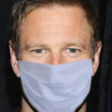

In [6]:
PIL.Image.open(df['File_path'][4])

In [7]:
Names = df['Name'].unique()

In [8]:
len(Names)

2996

In [9]:
k = 0
Labels_nonct = {}

for i in Names:
    Labels_nonct[i] = k
    k += 1

In [10]:
Labels_nonct

{'Aaron_Eckhart': 0,
 'Aaron_Guiel': 1,
 'Aaron_Peirsol': 2,
 'Aaron_Sorkin': 3,
 'Aaron_Tippin': 4,
 'Abbas_Kiarostami': 5,
 'Abdel_Aziz_Al-Hakim': 6,
 'Abdel_Nasser_Assidi': 7,
 'Abdoulaye_Wade': 8,
 'Abdullah': 9,
 'Abdullah_Gul': 10,
 'Abel_Pacheco': 11,
 'Abid_Hamid_Mahmud_Al-Tikriti': 12,
 'Abraham_Foxman': 13,
 'Adam_Ant': 14,
 'Adam_Freier': 15,
 'Adam_Kennedy': 16,
 'Adam_Mair': 17,
 'Adam_Rich': 18,
 'Adam_Sandler': 19,
 'Adolfo_Aguilar_Zinser': 20,
 'Adolfo_Rodriguez_Saa': 21,
 'Adoor_Gopalakarishnan': 22,
 'Adrian_Annus': 23,
 'Adrian_Fernandez': 24,
 'Adrian_Murrell': 25,
 'Adrian_Nastase': 26,
 'Adrien_Brody': 27,
 'Afton_Smith': 28,
 'Agnelo_Queiroz': 29,
 'Ahmed_Ahmed': 30,
 'Ahmed_Chalabi': 31,
 'Ahmed_Qureia': 32,
 'Ahmet_Demir': 33,
 'Ahmet_Necdet_Sezer': 34,
 'Aicha_El_Ouafi': 35,
 'Aileen_Riggin_Soule': 36,
 'Aishwarya_Rai': 37,
 'Aitor_Gonzalez': 38,
 'Ai_Sugiyama': 39,
 'Ajit_Agarkar': 40,
 'AJ_Lamas': 41,
 'Akbar_Hashemi_Rafsanjani': 42,
 'Akhmed_Zakayev': 43,
 

In [11]:
df['Labels'] = df['Name'].map(Labels_nonct)

In [12]:
df.head()

,Name,File_path,Labels
0,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...,0
1,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...,0
2,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...,0
3,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...,0
4,Aaron_Eckhart,post-processed/Aaron_Eckhart/Aaron_Eckhart_000...,0


In [13]:
def Splita_e_pega_imagem(data):
    
    X_train = pd.DataFrame()
    X_test = pd.DataFrame()
    y_train = []
    y_test = []
    
    for i in range(2996):
        n = round(len(data[data['Labels'] == i].values)/3)
        l = len(data[data['Labels'] == i])
        index_list = data[data['Labels'] == i].index.to_list()
        indexuru = index_list[0]
        r = random.sample(index_list, n)
        
        if not r:
            X_train = X_train.append(data.iloc[index_list],ignore_index = True)
            y_train.append(i)
        else:
            new_list = [Number for Number in index_list if Number not in r]
            
            X_train = X_train.append(data.iloc[r],ignore_index = True)
            y_train.append(i)            
            X_test = X_test.append(data.iloc[new_list],ignore_index = True)
            y_test.append(i)
            
    X_train = X_train.drop('Labels',axis=1)
    X_test = X_test.drop('Labels',axis=1)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    df_image = []

    for n in tqdm(range(X_train.shape[0])):
        img = image.load_img(X_train['File_path'][n], target_size=(112,112,1))
        img = image.img_to_array(img)
        img = img/255
        df_image.append(img)

    X_train = np.array(df_image)
    
    df_image = []
    
    for m in tqdm(range(X_test.shape[0])):
        img = image.load_img(X_test['File_path'][m], target_size=(112,112,1))
        img = image.img_to_array(img)
        img = img/255
        df_image.append(img)

    X_test = np.array(df_image)
    
    return [X_train,X_test,y_train,y_test]

In [14]:
def to_image(data):

    df_image = []

    for i in tqdm(range(data.shape[0])):
        img = image.load_img(data['File_path'][i], target_size=(112,112,1))
        img = image.img_to_array(img)
        img = img/255
        df_image.append(img)

    array = np.array(df_image)
    return array

In [15]:
X_train,X_test,y_train,y_test = Splita_e_pega_imagem(df)

100%|██████████| 7541/7541 [00:43<00:00, 172.35it/s]


In [16]:
y_train

array([   0,    1,    2, ..., 2993, 2994, 2995])

In [17]:
X_train

array([[[[0.09803922, 0.02352941, 0.03137255],
         [0.09803922, 0.02745098, 0.02745098],
         [0.09411765, 0.02352941, 0.02352941],
         ...,
         [0.10980392, 0.03529412, 0.00784314],
         [0.10980392, 0.03529412, 0.01176471],
         [0.10196079, 0.02745098, 0.00392157]],

        [[0.10196079, 0.02745098, 0.03529412],
         [0.09803922, 0.02745098, 0.02745098],
         [0.09411765, 0.02352941, 0.02352941],
         ...,
         [0.12941177, 0.05882353, 0.01960784],
         [0.10588235, 0.03137255, 0.00392157],
         [0.10196079, 0.02745098, 0.        ]],

        [[0.10196079, 0.03137255, 0.03137255],
         [0.09803922, 0.02745098, 0.02745098],
         [0.09019608, 0.01960784, 0.01176471],
         ...,
         [0.16078432, 0.09019608, 0.04313726],
         [0.11764706, 0.04705882, 0.00784314],
         [0.10588235, 0.03529412, 0.        ]],

        ...,

        [[0.22745098, 0.16470589, 0.10588235],
         [0.20784314, 0.14509805, 0.09411765]

In [18]:
X_test

array([[[[0.09803922, 0.02352941, 0.03137255],
         [0.09803922, 0.02745098, 0.02745098],
         [0.09411765, 0.02352941, 0.02352941],
         ...,
         [0.10980392, 0.03529412, 0.00784314],
         [0.10980392, 0.03529412, 0.01176471],
         [0.10196079, 0.02745098, 0.00392157]],

        [[0.10196079, 0.02745098, 0.03529412],
         [0.09803922, 0.02745098, 0.02745098],
         [0.09411765, 0.02352941, 0.02352941],
         ...,
         [0.12941177, 0.05882353, 0.01960784],
         [0.10588235, 0.03137255, 0.00392157],
         [0.10196079, 0.02745098, 0.        ]],

        [[0.10196079, 0.03137255, 0.03137255],
         [0.09803922, 0.02745098, 0.02745098],
         [0.09019608, 0.01960784, 0.01176471],
         ...,
         [0.16078432, 0.09019608, 0.04313726],
         [0.11764706, 0.04705882, 0.00784314],
         [0.10588235, 0.03529412, 0.        ]],

        ...,

        [[0.22745098, 0.16470589, 0.10588235],
         [0.20784314, 0.14509805, 0.09411765]

In [19]:
X_train.shape

(4459, 112, 112, 3)

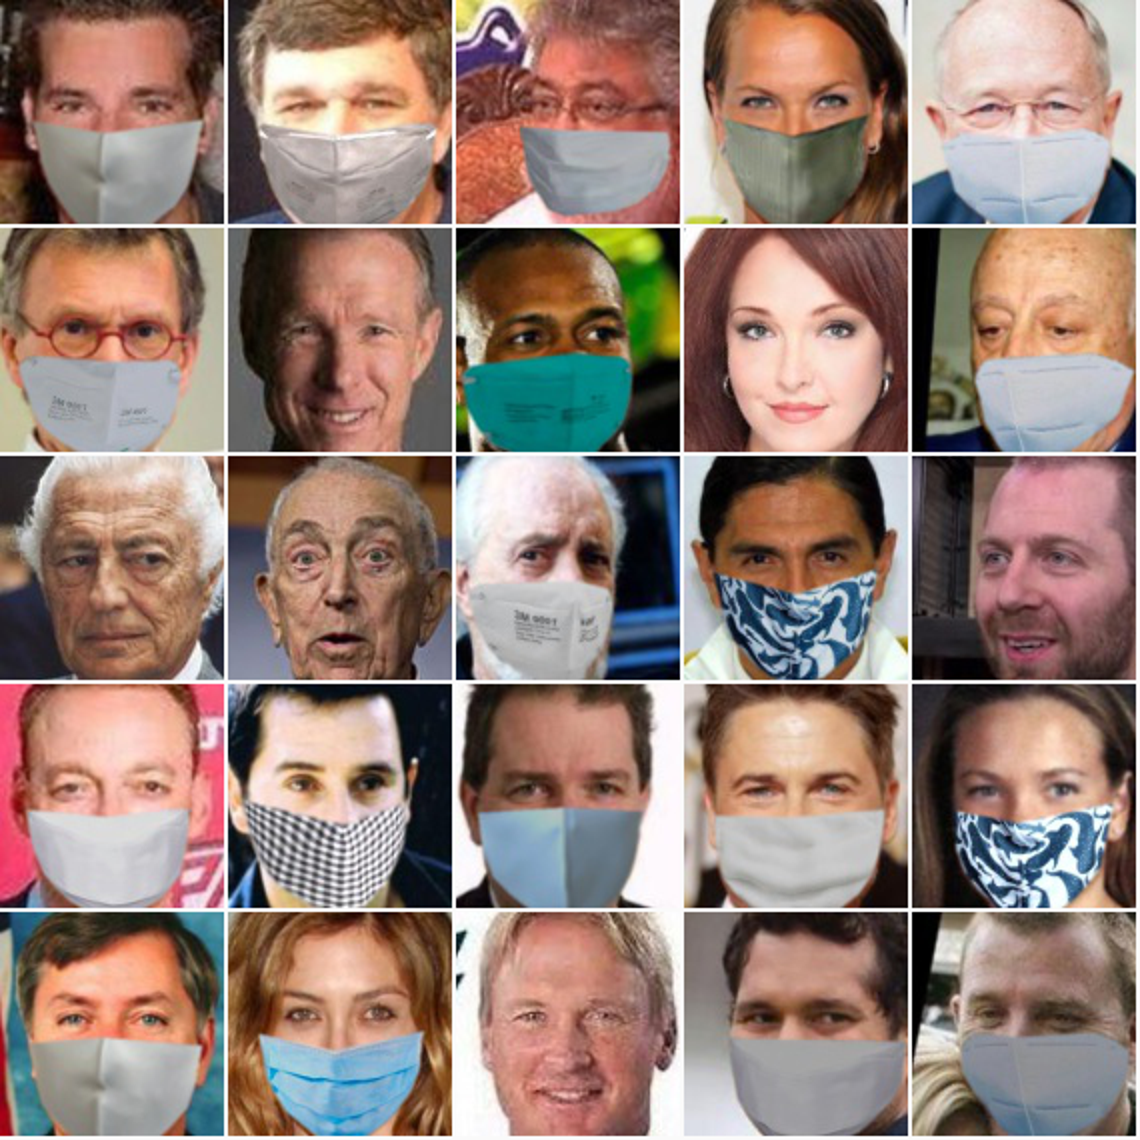

In [20]:
height_width = 112

def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage

sample_idxs = np.random.randint(0, 4459, size=(5, 5))
examples = X_train[sample_idxs]
show_collage(examples)

In [21]:
class_idx_to_train_idxs = defaultdict(list)
for y_train_idx, y in enumerate(y_train):
    class_idx_to_train_idxs[y].append(y_train_idx)

class_idx_to_test_idxs = defaultdict(list)
for y_test_idx, y in enumerate(y_test):
    class_idx_to_test_idxs[y].append(y_test_idx)

In [22]:
num_classes = 2996

class AnchorPositivePairs(keras.utils.Sequence):
    def __init__(self, num_batchs):
        self.num_batchs = num_batchs

    def __len__(self):
        return self.num_batchs

    def __getitem__(self, _idx):
        X = np.empty((2, num_classes, height_width, height_width, 3), dtype=np.float32)
        for class_idx in range(num_classes):
            examples_for_class = class_idx_to_train_idxs[class_idx]
            anchor_idx = random.choice(examples_for_class)
            positive_idx = random.choice(examples_for_class)
            while positive_idx == anchor_idx:
                positive_idx = random.choice(examples_for_class)
            X[0, class_idx] = X_train[anchor_idx]
            X[1, class_idx] = X_train[positive_idx]
        return X

# My pc could'nt run this code, it was taking to long to run, 4hours in and nothing to show for it

In [23]:
examples = next(iter(AnchorPositivePairs(num_batchs=1)))

show_collage(examples)

KeyboardInterrupt: 

In [ ]:
class EmbeddingModel(keras.Model):
    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        anchors, positives = data[0], data[1]

        with tf.GradientTape() as tape:
            anchor_embeddings = self(anchors, training=True)
            positive_embeddings = self(positives, training=True)

            similarities = tf.einsum(
                "ae,pe->ap", anchor_embeddings, positive_embeddings
            )

            temperature = 0.2
            similarities /= temperature

            sparse_labels = tf.range(num_classes)
            loss = self.compiled_loss(sparse_labels, similarities)

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        self.compiled_metrics.update_state(sparse_labels, similarities)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = layers.Input(shape=(height_width, height_width, 3))
X = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu")(inputs)
X = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu")(X)
X = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu")(X)
X = layers.GlobalAveragePooling2D()(X)
embeddings = layers.Dense(units=8, activation=None)(X)
embeddings = tf.nn.l2_normalize(embeddings, axis=-1)

model = EmbeddingModel(inputs, embeddings)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

history = model.fit(AnchorPositivePairs(num_batchs=1000), epochs=20)

plt.plot(history.history["loss"])
plt.show()

# Following the keras documentation, this is it.